In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_dataset_train.csv')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [3]:
df = df.drop(['ticket_id','id','station_nm', 'line_nm','entrance_nm'], axis=1)
df.pass_dttm = pd.to_datetime(df.pass_dttm)
df['day'] = df.pass_dttm.dt.dayofweek #день недели
df['hour'] = df.pass_dttm.dt.hour # час в формате 24
df['workday'] = df['day'].apply(lambda x: 0 if x == 5 or x == 6 else 1)
df = df.drop(columns=['pass_dttm'])
df.head()

,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,day,hour,workday
0,Пропуск FacePay,2402,11007,11,216.316667,8001,0,5,1
1,СК учащегося 30 дней,110,2006,2,648.183333,9011,0,5,1
2,БСК дружинника г.Москвы,110,2006,2,865.333333,7022,0,5,1
3,30 дней,110,2006,2,1048.233333,2022,0,5,1
4,КОШЕЛЕК,110,2006,2,965.600000,2017,0,5,1


In [4]:
iris_outcome = pd.crosstab(index=df["ticket_type_nm"], columns="count")
iris_outcome

col_0,count
ticket_type_nm,
1 сутки ЕДИНЫЙ ТК,123
1 сутки Пригород ТК,7
3 суток Единый ТК,504
30 дней,117064
30 дней Пригород,3098
30 дней ЕДИНЫЙ ТК,177041
30 дней Пригород ТК,45381
30 дней СК аспиранта,1045
30 дней СК ассистента-стажера,49


In [5]:
' '.join(df.ticket_type_nm[2].split(' ')[:2])

'БСК дружинника'

In [6]:
df['ticket_type_nm'] = df.ticket_type_nm.apply(lambda x: x.split(' ')[0])

In [7]:
iris_outcome = pd.crosstab(index=df["ticket_type_nm"], columns="count")
iris_outcome

col_0,count
ticket_type_nm,
1,130
3,504
30,417907
365,22830
60,46542
90,77652
ББК,29674
БСК,2829
Безналичная,60


In [8]:
df['ticket_type_nm'] = df.ticket_type_nm.apply(lambda x: x.split(' ')[0])

In [9]:
x = df.iloc[:, [1]].values
# res = []

# for i in range(1,10):
#     kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter =300, n_init=10, random_state=0)
#     kmeans.fit(x)
#     res.append(kmeans.inertia_)
# plt.plot(range(1, 10), res)
# plt.show()

In [10]:
# res
# plt.plot(range(5, 10), res[4:10])
# plt.show()

In [11]:

kmeans = KMeans(n_clusters = 10, init = "k-means++", max_iter =300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
df['entrance_id_typs'] = y_kmeans

In [12]:
x = df.iloc[:, [2]].values
# res = []

# for i in range(1,20):
#     kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter =300, n_init=10, random_state=0)
#     kmeans.fit(x)
#     res.append(kmeans.inertia_)
# plt.plot(range(1, 20), res)
# plt.show()

In [13]:
kmeans = KMeans(n_clusters = 10, init = "k-means++", max_iter =300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
df['station_id_typs'] = y_kmeans

In [14]:
# x = df.iloc[:, [5]].values
# res = []

# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter =300, n_init=10, random_state=0)
#     kmeans.fit(x)
#     res.append(kmeans.inertia_)
# plt.plot(range(1, 11), res)
# plt.show()

In [15]:
# kmeans = KMeans(n_clusters = 10, init = "k-means++", max_iter =300, n_init=10, random_state=0)
# y_kmeans = kmeans.fit_predict(x)
# df['label'] = y_kmeans

In [16]:
df.head(100)

,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,day,hour,workday,entrance_id_typs,station_id_typs
0,Пропуск,2402,11007,11,216.316667,8001,0,5,1,7,9
1,СК,110,2006,2,648.183333,9011,0,5,1,3,8
2,БСК,110,2006,2,865.333333,7022,0,5,1,3,8
3,30,110,2006,2,1048.233333,2022,0,5,1,3,8
4,КОШЕЛЕК,110,2006,2,965.600000,2017,0,5,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...
95,Пропуск,2251,11006,11,92.633333,11006,0,5,1,1,9
96,КОШЕЛЕК,33,1004,1,684.233333,5003,0,5,1,3,5
97,30,143,3017,3,528.333333,12004,0,5,1,5,0
98,Социальная,110,2006,2,656.216667,2007,0,5,1,3,8


In [17]:
mass1=['ticket_type_nm','entrance_id_typs','station_id_typs','day','hour','workday','line_id']
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[mass1])
ohe_model = ohe.transform(df[mass1])
(ohe.inverse_transform(ohe_model))
df[ohe.get_feature_names()] = ohe_model
# df.drop(columns=mass1,inplace=True)
df.head()

E:\Programm\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,day,hour,workday,entrance_id_typs,...,x6_7,x6_8,x6_9,x6_10,x6_11,x6_12,x6_13,x6_14,x6_15,x6_81
0,Пропуск,2402,11007,11,216.316667,8001,0,5,1,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,СК,110,2006,2,648.183333,9011,0,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,БСК,110,2006,2,865.333333,7022,0,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,110,2006,2,1048.233333,2022,0,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,КОШЕЛЕК,110,2006,2,965.600000,2017,0,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'], axis=1), df['label'], 
#                                                     test_size=0.30)

In [19]:
# from sklearn.linear_model import LogisticRegression

# reg = LogisticRegression()

In [20]:

# reg.fit(X_train, y_train)


In [21]:
# y_pred = reg.predict(X_test)

In [22]:
# from sklearn.metrics import r2_score, recall_score, mean_absolute_percentage_error
# print('recall: ',recall_score(y_pred, y_test, average='micro'))

In [23]:
df = df.drop(['label','ticket_type_nm'], axis=1)
df = df.loc[df.time_to_under > 0]

In [24]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [25]:
mass_std = ['entrance_id', 'station_id', 'line_id', 'day', 'hour', 'workday', 'entrance_id_typs','station_id_typs']

In [26]:

std_scaler.fit(df[mass_std])


StandardScaler()

In [27]:
std_scaled = std_scaler.transform(df[mass_std])
std_scaled

array([[ 1.71466555,  0.19288636,  0.19323844, ...,  0.55479087,
         1.11000203,  1.65908028],
       [-0.83099058, -0.52884951, -0.52840291, ...,  0.55479087,
        -0.28673853,  1.29472319],
       [-0.83099058, -0.52884951, -0.52840291, ...,  0.55479087,
        -0.28673853,  1.29472319],
       ...,
       [-0.82210522, -0.52852878, -0.52840291, ...,  0.55479087,
        -0.28673853,  1.29472319],
       [ 1.77019906,  0.19344765,  0.19323844, ...,  0.55479087,
         1.11000203,  1.65908028],
       [-0.59774984, -0.12720803, -0.12749105, ...,  0.55479087,
        -1.33429395,  0.93036609]])

In [28]:
df[mass_std] = std_scaled
df.head()

,entrance_id,station_id,line_id,time_to_under,day,hour,workday,entrance_id_typs,station_id_typs,x0_1,...,x6_7,x6_8,x6_9,x6_10,x6_11,x6_12,x6_13,x6_14,x6_15,x6_81
0,1.714666,0.192886,0.193238,216.316667,-1.441945,-1.267236,0.554791,1.110002,1.659080,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.830991,-0.528850,-0.528403,648.183333,-1.441945,-1.267236,0.554791,-0.286739,1.294723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.830991,-0.528850,-0.528403,865.333333,-1.441945,-1.267236,0.554791,-0.286739,1.294723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.830991,-0.528850,-0.528403,1048.233333,-1.441945,-1.267236,0.554791,-0.286739,1.294723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.830991,-0.528850,-0.528403,965.600000,-1.441945,-1.267236,0.554791,-0.286739,1.294723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['time_to_under'], axis=1), df['time_to_under'], 
                                                    test_size=0.30)

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [31]:
y_pred = reg.predict(X_test)


In [32]:
from sklearn.metrics import r2_score, recall_score, mean_absolute_percentage_error
print('R2: ',r2_score(y_test, y_pred))

R2:  0.5023867138786118


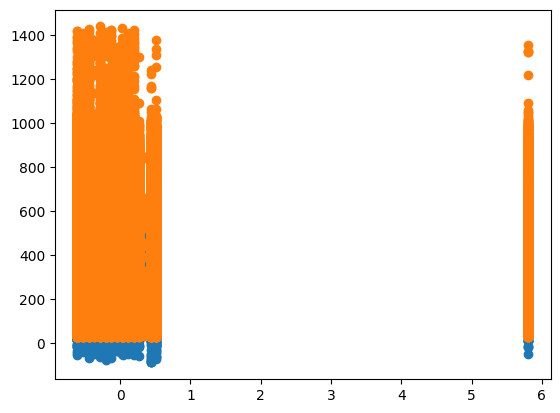

In [33]:
plt.figure()
plt.scatter(X_test['station_id'], y_pred)
plt.scatter(X_test['station_id'], y_test)
plt.show()

In [34]:
!pip install catboost

In [35]:
from catboost import CatBoostRegressor, cv, Pool, CatBoostClassifier


In [36]:
model = CatBoostRegressor(iterations=100,
                          learning_rate=1,
                          depth=2)


In [37]:
model.fit(X_train, y_train)

0:	learn: 175.5894991	total: 242ms	remaining: 23.9s
1:	learn: 171.8919348	total: 275ms	remaining: 13.5s
2:	learn: 168.9292197	total: 307ms	remaining: 9.91s
3:	learn: 167.0098586	total: 341ms	remaining: 8.18s
4:	learn: 166.0049989	total: 370ms	remaining: 7.03s
5:	learn: 165.4258611	total: 399ms	remaining: 6.26s
6:	learn: 164.9908295	total: 433ms	remaining: 5.75s
7:	learn: 164.6710547	total: 462ms	remaining: 5.32s
8:	learn: 164.5265196	total: 494ms	remaining: 5s
9:	learn: 164.3909895	total: 527ms	remaining: 4.74s
10:	learn: 164.2920926	total: 555ms	remaining: 4.49s
11:	learn: 164.2236404	total: 583ms	remaining: 4.27s
12:	learn: 164.1657214	total: 611ms	remaining: 4.09s
13:	learn: 164.1067110	total: 638ms	remaining: 3.92s
14:	learn: 164.0727226	total: 667ms	remaining: 3.78s
15:	learn: 164.0386667	total: 705ms	remaining: 3.7s
16:	learn: 163.9931692	total: 739ms	remaining: 3.61s
17:	learn: 163.9603203	total: 770ms	remaining: 3.51s
18:	learn: 163.9311060	total: 799ms	remaining: 3.41s
19:	lea

In [38]:
from catboost import CatBoostRegressor, cv, Pool, CatBoostClassifier
model = CatBoostRegressor(iterations=100,
                          learning_rate=1,
                          depth=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
from sklearn.metrics import r2_score, recall_score, mean_absolute_percentage_error
print('R2: ',r2_score(y_test, preds ))

0:	learn: 175.5894991	total: 31.5ms	remaining: 3.11s
1:	learn: 171.8919348	total: 60.2ms	remaining: 2.95s
2:	learn: 168.9292197	total: 89.4ms	remaining: 2.89s
3:	learn: 167.0098586	total: 126ms	remaining: 3.01s
4:	learn: 166.0049989	total: 157ms	remaining: 2.99s
5:	learn: 165.4258611	total: 189ms	remaining: 2.96s
6:	learn: 164.9908295	total: 225ms	remaining: 2.99s
7:	learn: 164.6710547	total: 259ms	remaining: 2.98s
8:	learn: 164.5265196	total: 296ms	remaining: 2.99s
9:	learn: 164.3909895	total: 333ms	remaining: 3s
10:	learn: 164.2920926	total: 369ms	remaining: 2.98s
11:	learn: 164.2236404	total: 402ms	remaining: 2.95s
12:	learn: 164.1657214	total: 436ms	remaining: 2.92s
13:	learn: 164.1067110	total: 469ms	remaining: 2.88s
14:	learn: 164.0727226	total: 505ms	remaining: 2.86s
15:	learn: 164.0386667	total: 536ms	remaining: 2.81s
16:	learn: 163.9931692	total: 566ms	remaining: 2.76s
17:	learn: 163.9603203	total: 594ms	remaining: 2.7s
18:	learn: 163.9311060	total: 619ms	remaining: 2.64s
19:	